<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/informe_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripcion del problema

Entrada: Un grafo coo los bordes y sus respectivos pesos y un vértice src.

Salida: una matriz donde cada índice denota la longitud de ruta más corta entre ese vértice y el vértice src.

# Descripcion del algoritmo (Bellmand-Ford)


1.   En este paso, declararíamos una matriz de tamaño V (Número de vértices) digamos dis[] e inicializaríamos con todos sus índices con un Valor muy grande (preferiblemente INT_MAX) excepto src que se inicializará con el valor 0. Estamos haciendo esto porque inicialmente asumimos que lleva un tiempo infinito llegar a cualquiera de los vértices de nuestro vértice de origen y estamos inicializando dis[src]=0 porque ya estamos en el vértice de origen.

2.   En este paso, se calcula la distancia más corta. Para ello, haríamos el paso subyacente V-1 veces. Para cada arista u→v hacer dis[v]=min(dis[u]+ wt de arista u→v, dis[v]) Esto significa que cada vez que estemos en cualquier vértice u comprobaremos si podemos alcanzar alguno de sus vecinos en menos tiempo que actualmente es posible visitar, actualizaremos el dis[v] a dis[u]+wt del borde u→v.

1.   En este paso, verificaremos si existe un ciclo de peso de borde negativo que atraviese todos y cada uno de los bordes u→v y verificaremos si existe dis[u] + wt del borde u→v < dis[v], entonces nuestro gráfico contiene un valor negativo ciclo de peso de borde porque atravesar los bordes una y otra vez es beneficioso ya que reduce el costo de recorrer el gráfico.






# Ejemplo
El algoritmo de Bellman Ford funciona sobreestimando la longitud del camino desde el vértice inicial hasta todos los demás vértices. Luego relaja iterativamente esas estimaciones al encontrar nuevos caminos que son más cortos que los caminos sobreestimados previamente.

Al hacer esto repetidamente para todos los vértices, podemos garantizar que el resultado esté optimizado.

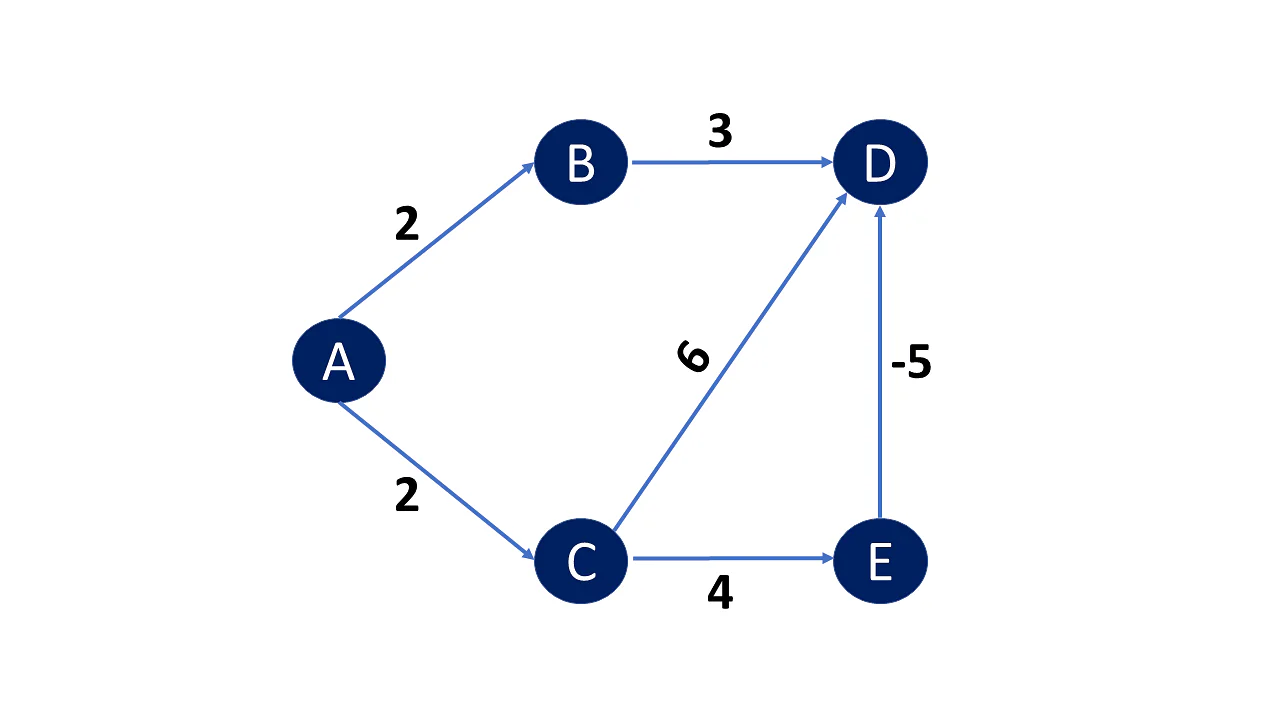

Elija el valor de ruta 0 para el vértice de origen e infinito para todos los demás vértices.

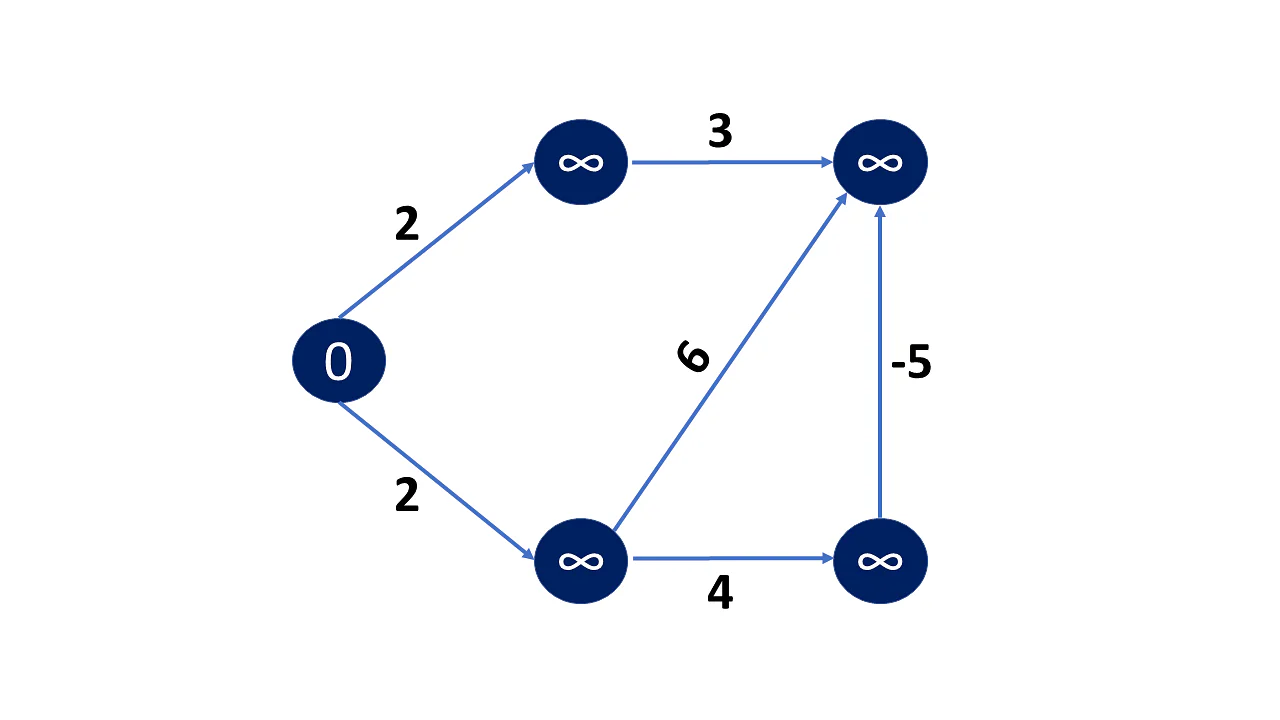

Si la nueva longitud de la ruta calculada es menor que la longitud de la ruta anterior, vaya al borde vecino del vértice de origen y relaje la longitud de la ruta del vértice adyacente.

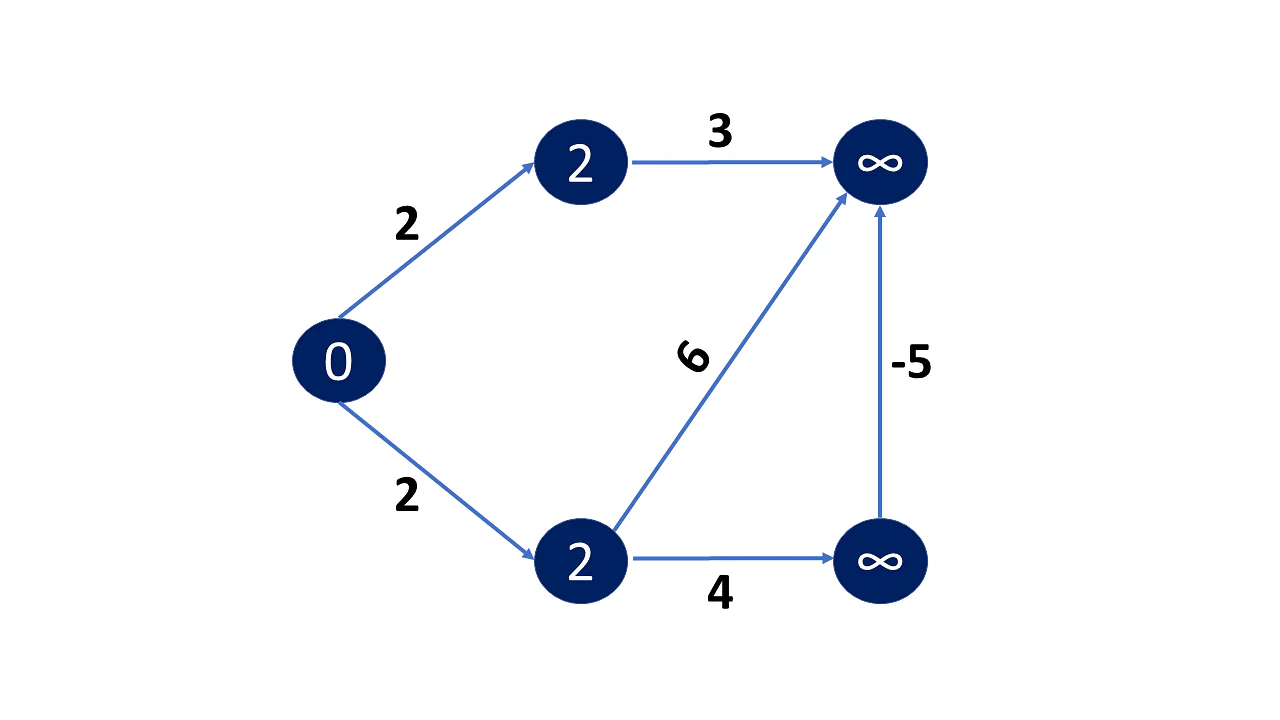

Este procedimiento debe repetirse V-1 veces, donde V es el número de vértices en total. Esto sucedió porque, en el peor de los casos, la longitud de la ruta de cualquier vértice se puede cambiar N veces a una longitud de ruta aún más corta.

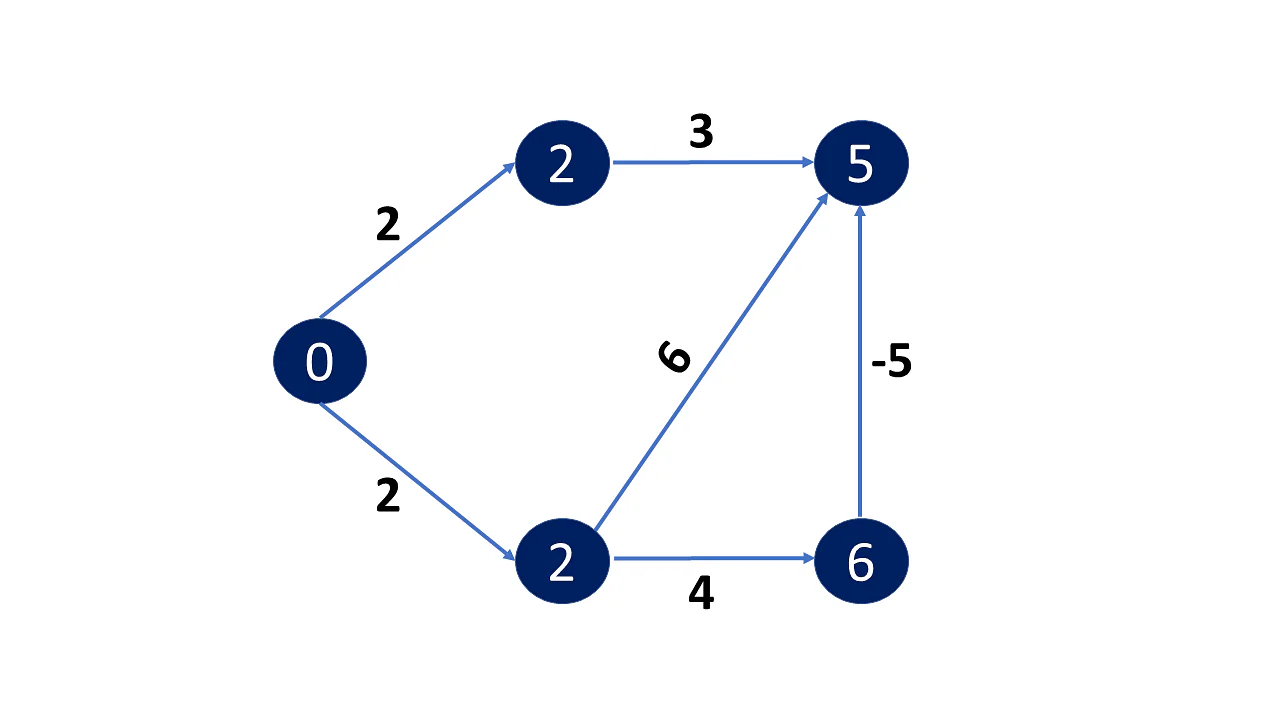

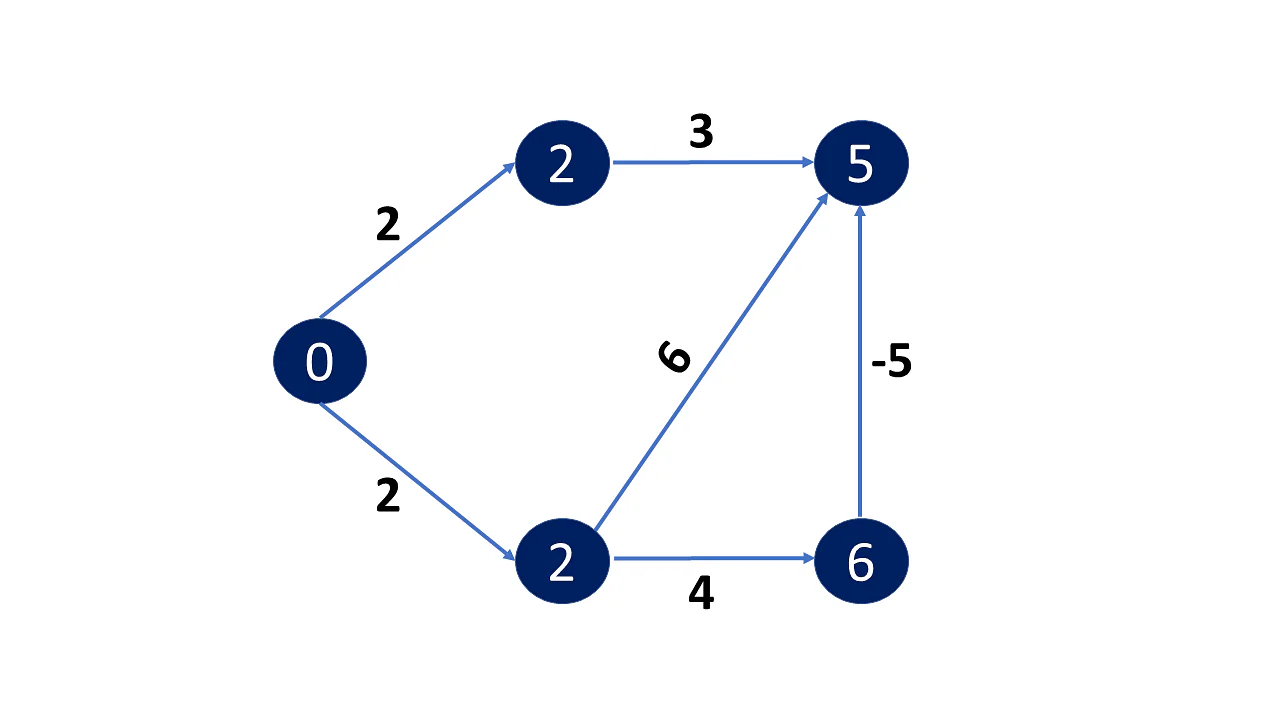

Como resultado, después de las iteraciones V-1, encuentra sus nuevas longitudes de ruta y puede determinar si el gráfico tiene un ciclo negativo o no.

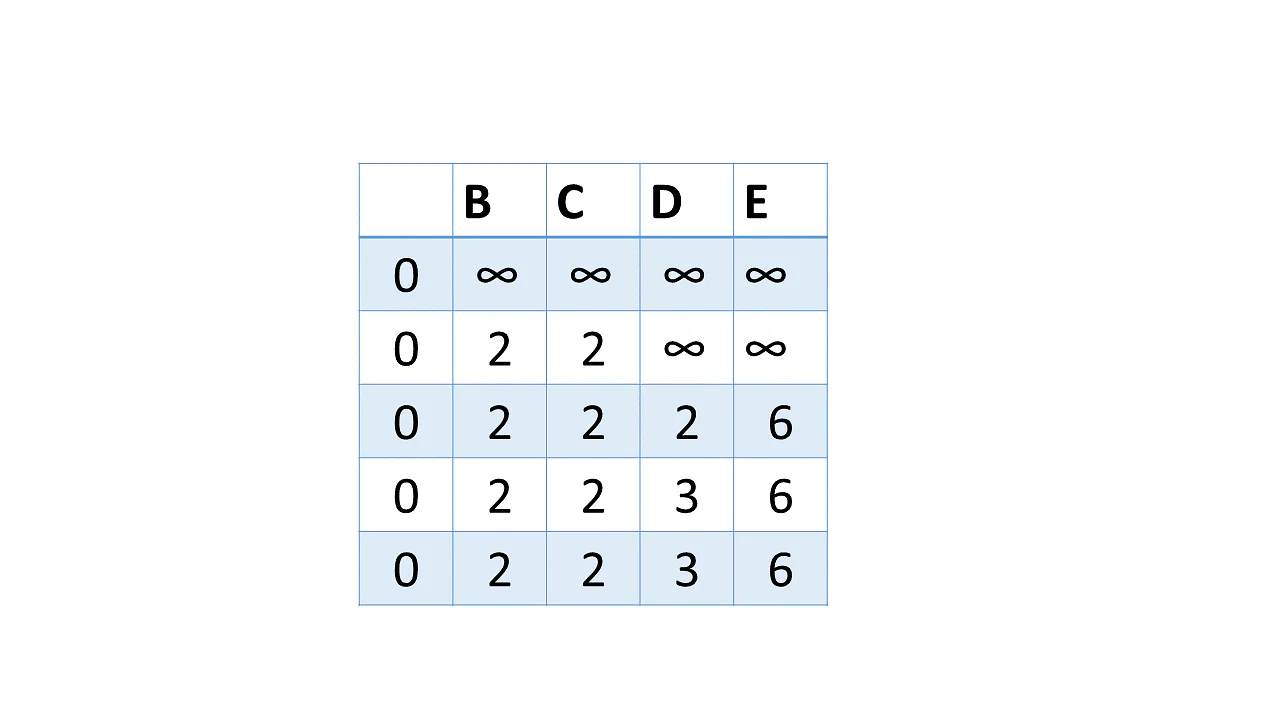

# Descripcion Dijkstra 
En este algoritmo, cada vértice tendrá dos propiedades definidas para él:

Propiedad visitada :-

Esta propiedad representa si el vértice ha sido visitado o no.
Estamos usando esta propiedad para no volver a visitar un vértice.
Un vértice se marca como visitado solo después de que se haya encontrado el camino más corto hacia él.

Propiedad de la ruta : -

Esta propiedad almacena el valor de la ruta mínima actual al vértice. El camino mínimo actual significa el camino más corto en el que hemos llegado a este vértice hasta ahora.
Esta propiedad se actualiza cada vez que se visita cualquier vecino del vértice.
La propiedad de ruta es importante ya que almacenará la respuesta final para cada vértice.


1. Marque el nodo de origen con una distancia actual de 0 y el resto con infinito.
2. Establezca el nodo no visitado con la distancia actual más pequeña como el nodo actual, digamos C .
3. Para cada vecino N del nodo actual C : agregue la distancia actual de C con el peso del borde que conecta CN . Si es menor que la distancia actual de N, configúrelo como la nueva distancia actual de N .
4. Marque el nodo actual C como visitado.
5. En el caso de que haya nodos sin visitar repetir paso 2.

# Ejemplo

Supongamos que el siguiente gráfico es nuestra entrada con el vértice A como fuente.

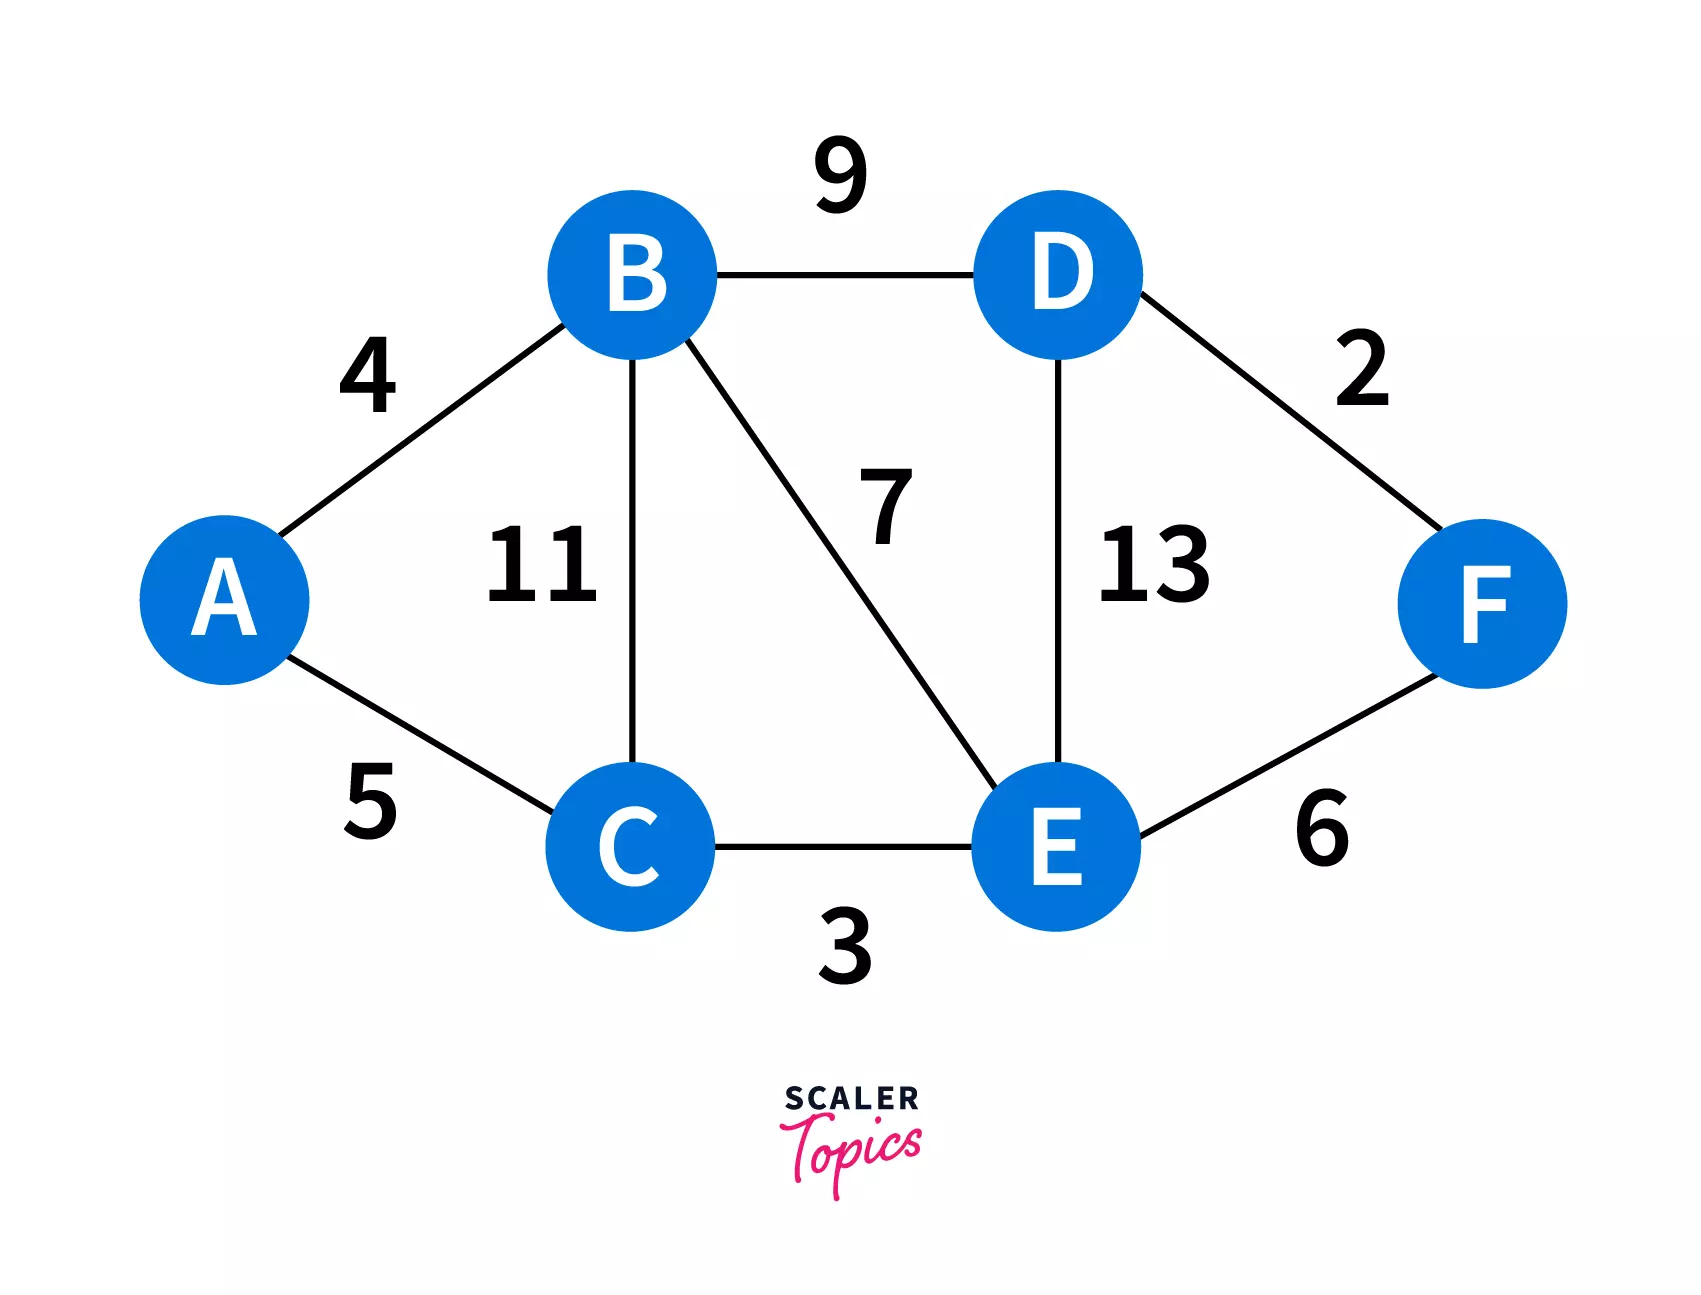

-Inicialmente todos los vértices están marcados como no visitados.

-El camino a A es 0 y para todos los demás vértices se establece en infinito.

-Ahora el vértice fuente A se marca como visitado. Luego se accede a sus vecinos (solo se accede y no se visita).

-El camino a B se actualiza a 4 usando relajación, ya que el camino a A es 0 y el camino de A a B es 4 , por lo que min((0+4),∞) es 4 .

-El camino a C se actualiza a 5 usando la relajación, ya que el camino a A es 0 y el camino de A a C es 5 , por lo que min((0+5),∞) es 5. Ambos vecinos de A están relajados, así que nos movemos adelante.

-Luego, se selecciona y visita el siguiente vértice no visitado con la menor ruta. Entonces, el vértice B es visitado y sus vecinos no visitados son relajados. Después de relajarse, el camino a C sigue siendo 5 , el camino a E se vuelve 11 y el camino a D se vuelve 13 .

-Entonces se visita el vértice C y se relaja su vecino no visitado E. Mientras relajamos E , encontramos que el camino a E vía es más pequeño que su camino actual, por lo que el camino a E se actualiza a 8. Todos los vecinos de C ahora están relajados.

-Se visita el vértice E y se relajan sus vecinos B, D y F. Como solo el vértice F no está visitado, F está relajado. El camino de B sigue siendo 4 , el camino a D sigue siendo 13 y el camino a F se convierte en 14(8+6) .

-Entonces se visita el vértice D y solo se relaja F. .El camino al vértice F sigue siendo 14 .

-Ahora solo queda el vértice F , por lo que se visita pero no se realizan relajaciones ya que todos sus vecinos ya han sido visitados.

-Tan pronto como se visitan todos los vértices, el programa se detiene.

-Los caminos finales que obtenemos son:

A=0(fuente)

B=4(A->B)

C=5(A->C)

D=13(A->B->8

E=8(A->C->E)

F=14!(A->C->E->F)

# Generadores de instancias

In [4]:
import random
import networkx as nx

### Generadores de instancia ###

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_b(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator_b(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_b(n)

    return graph, graph[0][0]

def instance_generator_d(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator_d(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_d(n)

    return graph, graph[0][0]

##Conversión de grafo al formato "networkx"##
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [46]:
def bellmanFord(V, src, edges, verbose=False, visualize=False):
 
  dis = [99999999] * edges
  dis[src] = 0 
  if verbose == True: print(f"Se inicializa la lista de distancias: {dis}")
  if visualize == True:
    G_to_networkx = graph_to_nxdigraph(V, edges) #Se transforma nuestro grafo a uno compatible con la libreria networkx
    pos=nx.spring_layout(G_to_networkx)
    labels = nx.get_edge_attributes(G_to_networkx,'weight') #Se agregan los pesos a nuestro grafo visual
    #Con ayuda de los comandos proveídos por networkx, mostramos en pantalla el grafo en el que se está trabajando
    nx.draw_networkx_edge_labels(G_to_networkx,pos,edge_labels=labels,font_size=10)
    nx.draw(G_to_networkx, pos, with_labels = True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

  if verbose == True: print("\n Recorremos todos los arcos del grafo")
  for i in range(edges-1):
    if verbose == True: 
      print(f"Iteración {i+1}")
    for u, v, wt in V:
      if dis[u] != 99999999 and dis[u] + wt < dis[v]:
        dis[v] = dis[u] + wt
        if verbose == True: print(f"Nuevo camino más corto entre {src} y {v}! --> {dis[v]}")
  
  if verbose == True: print("Se buscan ciclos negativos")
  for u, v, wt in V:
    if dis[u] != 99999999 and dis[u] + wt < dis[v]:   
      if verbose == True: print(f"Se encontro un ciclo negativo se muestra un mensaje y se retorna una lista de distancias vacias")
      print("EL GRAFO POSEE UN CICLO NEGATIVO")  
      return []

  if verbose==True: print("\nNo se encontraron ciclos negativos se retorna una lista con las distancias")   
  #print("Distancia de cada vértice desde la fuente:")
  #for i in range(len(dis)):
   #print("{0}\t\t{1}".format(i, dis[i]))
  
  return dis

# Ejemplo con funcion verbose

In [ ]:
n_bellman = random.randint(5,25)
G_bellman, fuente_bellman = instance_generator_b(n_bellman)

print("entrada:",G_bellman)

d=bellmanFord(G_bellman, fuente_bellman, n_bellman, verbose = True, visualize  = False)


entrada: [(3, 18, 29), (3, 24, 35), (2, 19, 95), (2, 5, 97), (24, 8, 37), (24, 10, 48), (10, 2, 98), (10, 22, 60), (10, 21, 79), (12, 0, 38), (12, 6, 33), (21, 14, 62), (21, 8, 4), (17, 6, 69), (17, 15, 47), (17, 13, 13), (9, 23, 83), (9, 15, 67), (19, 14, 72), (23, 14, 81), (23, 10, 13), (23, 12, 80), (16, 4, 35), (16, 13, 49), (16, 17, 22), (1, 20, 45), (1, 19, 83), (4, 3, 36), (4, 6, 1), (0, 5, 74), (7, 2, 67), (7, 10, 55), (11, 9, 72), (11, 18, 41), (15, 5, 16), (8, 6, 86), (8, 1, 75), (5, 9, 35), (20, 17, 44), (20, 24, 36), (20, 2, 98), (6, 22, 5), (6, 19, 83), (6, 16, 98), (22, 7, 57), (22, 4, 8), (22, 14, 13), (14, 0, 7), (14, 13, 4), (13, 20, -8), (13, 7, 75), (13, 0, 16), (18, 10, 84), (2, 11, -22)]
Se inicializa la lista de distancias: [99999999, 99999999, 99999999, 0, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999, 99999999]


# Ejemplo con funcion visualize

entrada: [(5, 9, 92), (1, 0, 73), (1, 10, 14), (1, 8, 58), (6, 3, 20), (7, 11, 99), (7, 12, 63), (9, 0, 38), (9, 8, 20), (9, 2, 58), (11, 6, 24), (11, 1, 93), (10, 7, 90), (0, 11, 82), (2, 11, 85), (3, 9, 17), (3, 12, 66), (3, 10, 80), (8, 0, 81), (8, 11, 76), (8, 3, 54), (12, 10, 22), (12, 11, 15), (4, 10, 100), (4, 9, 88), (4, 11, 68), (8, 5, 89), (6, 4, 57)]
Distancia de cada vértice desde la fuente:
0		130
1		281
2		150
3		166
4		269
5		0
6		212
7		336
8		112
9		92
10		246
11		188
12		232


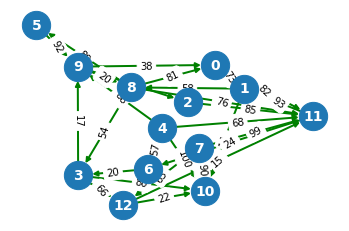

In [ ]:
n_bellman = random.randint(5,25)
G_bellman, fuente_bellman = instance_generator_b(n_bellman)

print("entrada:",G_bellman)

d=bellmanFord(G_bellman, fuente_bellman, n_bellman, verbose = False, visualize  = True)

In [44]:
def dijkstra(V, src,edges,visualize=False):
        if visualize == True:
          G_to_networkx = graph_to_nxdigraph(V, edges) #Se transforma nuestro grafo a uno compatible con la libreria networkx
          pos=nx.spring_layout(G_to_networkx)
          labels = nx.get_edge_attributes(G_to_networkx,'weight') #Se agregan los pesos a nuestro grafo visual
          nx.draw_networkx_edge_labels(G_to_networkx,pos,edge_labels=labels,font_size=10)
          nx.draw(G_to_networkx, pos, with_labels = True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="red")                                                    
        G = [[0 for i in range(edges)] for j in range(edges)]
        for node in range(edges):
          for (x, y, peso) in V:
              G[x][y] = peso
        V=G
        dist = [float("inf")] * edges
        dist[src] = 0
        sptSet = [False] * edges
 
        for cout in range(edges-1):
          min = float("inf")
          min_index = 0

          for u in range(edges):
            if dist[u] < min and sptSet[u] == False:                               
              min = dist[u]
              min_index = u
          x = min_index



          sptSet[x] = True
 

          for v in range(edges-1):
              if (V[x][v] > 0 and sptSet[v] == False and dist[v] > dist[x] + V[x][v]):
                  dist[v] = dist[x] + V[x][v]
 
       # print("Distancia de cada vértice desde la fuente:")
        #for i in range(len(dist)):
         # print("{0}\t\t{1}".format(i, dist[i]))
        return dist  

Distancia de cada vértice desde la fuente:
0		30
1		32
2		42
3		55
4		0


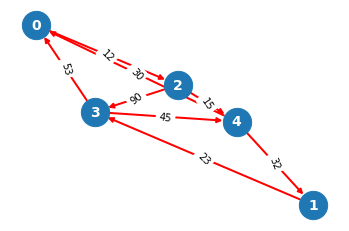

In [39]:
tam = random.randint(5,25)
Graf, fuente = instance_generator_d(tam)
b=dijkstra(Graf,fuente,tam)

# Prueba visualize

Distancia de cada vértice desde la fuente:
0		inf
1		21
2		127
3		0
4		81
5		85
6		inf


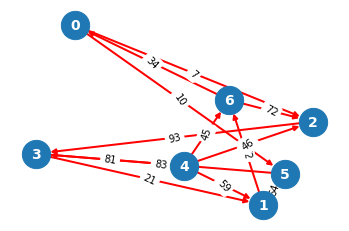

In [41]:
tam = random.randint(5,25)
Graf, fuente = instance_generator_d(tam)
b=dijkstra(Graf,fuente,tam,True)

# Análisis de complejidad de Bellman Ford

## Complejidad del tiempo
  Dado que estamos recorriendo todos los bordes V-1 veces, y cada vez estamos recorriendo todos los vértices E , por lo tanto, la complejidad del tiempo es O(VE) .

## Complejidad espacial
  Como estamos usando un arreglo auxiliar dis de tamaño V , la complejidad del espacio es O(V) .

  Donde V y E son números de vértices y aristas respectivamente.


# Complejidad del tiempo del algoritmo de Dijkstra
Debido a que el algoritmo de Dijkstra posee:

Tiempo para visitar todos los vértices = O(V+E)

Tiempo requerido para procesar un vértice= O(logV)

Tiempo requerido para visitar y procesar todos los vértices = O(V+E)*O(logV) = O((V+E) * logV)

siendo O((V+E) * logV) su tiempo de ejecucion total 


# Correctitud

Teorema:Después de la iteración i de Bellman-Ford, v.  d es como máximo el peso de cada camino de s a v usando como máximo i aristas, para todo v E V.

Prueba:Por inducción en i .  
- Antes de la iteración i , v .  d ≤ min { w ( p ) : ( p≤i - 1 } 
- la relajacion solo disminuye v . d's ⇒ sigue siendo cierto 
- La iteración i considera todos los caminos con ≤ i bordes al relajar los bordes entrantes de v.

# Experimentos

## Comparacion de tiempos de ejecucion

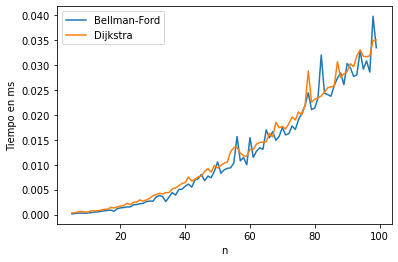

In [50]:
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; z=[]


for n in range(5,100):
  
  a, b = instance_generator_d(n)
  
  t1 = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({a},{b},{n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dijkstra", stmt=f"dijkstra({a},{b},{n})", repeat=1, number=10)
  
  x.append(n)
  y.append(t1)
  z.append(t2)


plt.plot(x, y)
plt.plot(x,z)
plt.legend([ "Bellman-Ford","Dijkstra"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# Analisis comparacion de tiempo de ejecucion experimental
(se uso un generador sin pesos negativos)

Como se puede apresiar en la grafica ambos algoritmos mantuvieron un tiempo de ejecucion similar pero debido a que el tiempo de ejcucion del algoritmo Dijkstra es menor al del algoritmo Bellmand-Ford se pueden apreciar que en ciertos puntos Dijkstra es mas eficiente.

Se puede decir que la razon por la cual Dijkstra es mas rapido se  debe a que Su implementación está inspirada en el enfoque codicioso en cambio Bellmand-Ford Su implementación está inspirada en el enfoque de programación dinámica.

# Tiempo de ejecucion bellmand-Ford

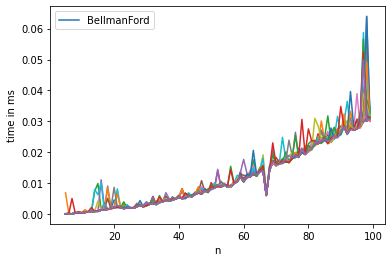

In [52]:
import matplotlib.pyplot as plt
import math
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,100):

  a, b = instance_generator_b(n)

  t = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({a}, {b}, {n})", repeat=25, number=10)

  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["BellmanFord"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()